# Jonathan Halverson
# Friday, March 25, 2016
# Some probability problems

### In a class of 15 students, if the professor asks 3 questions, what is the probability that you will not be selected? Assume that she will not pick the same person twice.

### One solution is to recognize on the first question p=14/15, on the second 13/14 and on the last 12/13 giving:

In [49]:
(14/15.0) * (13/14.0) * (12/13.0)

0.8

### Above we are multiplying a marginal probability with two conditional probabilities i.e., P(q1) P(q2 | q1) P(q3 | q1, q2).

### An alternative solution to the problem is to determine how many groups of 3 can be made excluding the one person and divide by the total number of groups that can be made:

In [50]:
from scipy.special import binom

total_number_of_groups_of_three = binom(15, 3)
number_of_groups_of_three_excluding_one_person = binom(1, 0) * binom(14, 3)
print number_of_groups_of_three_excluding_one_person / total_number_of_groups_of_three

0.8


### Your department is holding a raffle. They sell 30 tickets and offer seven prizes. They place the tickets in a hat and draw one for each prize. The tickets are sampled without replacement, i.e. the selected tickets are not placed back in the hat. What is the probability of winning a prize if you buy one ticket?

In [51]:
import random

trials = 10000
success = 0
for _ in range(trials):
    tickets = range(1, 31)
    for _ in range(7):
        value = random.choice(tickets)
        if (value == 1): success += 1
        tickets.remove(value)
print success / float(trials)

0.2378


### The solution is

In [52]:
1.0 - (29/30.0) * (28/29.0) * (27/28.0) * (26/27.0) * (25/26.0) * (24/25.0) * (23/24.0)

0.2333333333333334

###  (b) What if the tickets are sampled with replacement? What is the probability of winning at least one prize?

In [53]:
trials = 10000
success = 0
tickets = range(1, 31)
for _ in range(trials):
    for _ in range(7):
        value = random.choice(tickets)
        if (value == 1):
            success += 1
            break
print success / float(trials)

0.2148


### The solution for this case is

In [54]:
1.0 - (29/30.0)**7

0.21125394106081385

### In the above case, it may be tempting to answer 7/30. This logic cannot be right since if p=1/2 then one would answer 7/2 which is greater than 1. Here is an alternative solution using the binomial distribution with p=1/30:

In [59]:
from scipy.stats import binom
1.0 - binom.cdf(k=0, n=7, p=1/30.0)

0.21125394106081385

### The idea is to recognize that seven draws looks like LLWLLWL or LLLLLWL where L is lost and W is win. These are just coin flips or Bernoulli trials so Binomial distribution is appropriate.

In [56]:
from scipy.special import binom as choose
sum([choose(7, k) * ((1/30.)**k) * (29/30.)**(7-k) for k in range(1, 8)])

0.21125394106081394

### Below we plot the probability mass function:

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

(0, 1)

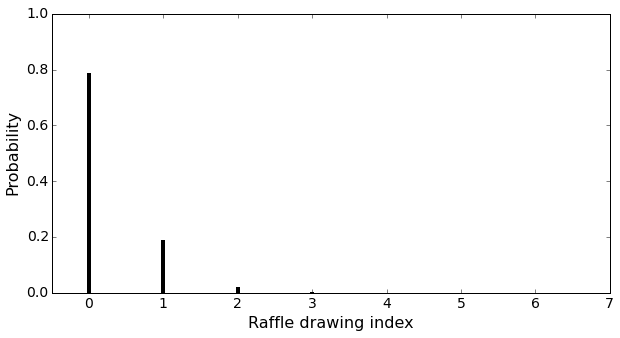

In [58]:
draws = 7
plt.vlines(x=range(draws + 1), ymin=np.zeros(draws + 1), ymax=binom.pmf(range(draws + 1), n=draws, p=1/30.0), lw=4)
plt.xlabel('Raffle drawing index')
plt.ylabel('Probability')
plt.xlim(-0.5, 7)
plt.ylim(0, 1)